In [1]:
import os
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
os.chdir(parent_directory)
print("Working directory:", os.getcwd())

Working directory: c:\Users\benjo\OneDrive\Data Science Masters\DSMP\dsmp-2024-group-19


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tools import *

In [3]:
tape1 = read_merged_data()[0]

Opening UoB_Set01_2025-01-02tapes.csv


In [4]:
def resample_1min(df):    
    df["Price x Volume"] = df["Tapes Price"] * df["Volume"]
    resampled_df = df.resample("60s").sum()
    resampled_df["Tapes Price"] = resampled_df["Price x Volume"] / resampled_df["Volume"]
    resampled_df["Last Tapes Price"] = resampled_df["Tapes Price"].ffill()
    return resampled_df


In [5]:
tape1_minute = resample_1min(tape1)
tape1_minute.head()

,alpha,beta,mid_price,low_ask,high_bid,Volume,Tapes Price,Last Tapes Price,Price x Volume
combined_time,,,,,,,,,
2025-01-02 08:00:00,142.370557,191.795344,15924.5,16408.0,15442.0,68.0,262.102941,262.102941,17823.0
2025-01-02 08:01:00,129.588416,192.385616,15628.0,15774.0,15482.0,106.0,260.669811,260.669811,27631.0
2025-01-02 08:02:00,109.133782,270.913283,15926.0,16074.0,15778.0,89.0,264.000000,264.000000,23496.0
2025-01-02 08:03:00,157.633514,280.494751,15915.5,16025.0,15806.0,86.0,263.000000,263.000000,22618.0
2025-01-02 08:04:00,142.513386,236.075426,15960.0,16114.0,15806.0,78.0,263.102564,263.102564,20522.0


In [6]:
tape2 = read_merged_data(1)


Opening UoB_Set01_2025-01-02tapes.csv
Opening UoB_Set01_2025-01-03tapes.csv


In [7]:
tape2_minute = resample_1min(tape2[1])
tape2_minute.head()

,alpha,beta,mid_price,low_ask,high_bid,Volume,Tapes Price,Last Tapes Price,Price x Volume
combined_time,,,,,,,,,
2025-01-03 08:00:00,79.919480,94.603913,15876.0,17532.0,14855.0,82.0,284.402439,284.402439,23321.0
2025-01-03 08:01:00,116.380791,178.119343,17253.0,17399.0,17107.0,78.0,286.858974,286.858974,22375.0
2025-01-03 08:02:00,107.703024,214.892787,17632.0,17813.0,17451.0,66.0,291.818182,291.818182,19260.0
2025-01-03 08:03:00,109.571140,265.602753,17899.0,18074.0,17724.0,81.0,295.432099,295.432099,23930.0
2025-01-03 08:04:00,120.491446,297.276601,17988.0,18164.0,17812.0,72.0,296.222222,296.222222,21328.0


In [8]:
from pmdarima.arima import auto_arima

# auto_arima model
model = auto_arima(tape1_minute["Tapes Price"], seasonal=False, suppress_warnings=True)

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  510
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -1165.049
Date:                Thu, 21 Mar 2024   AIC                           2342.098
Time:                        17:02:40   BIC                           2367.493
Sample:                    01-02-2025   HQIC                          2352.055
                         - 01-02-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0236      0.021      1.106      0.269      -0.018       0.065
ar.L1          0.8676      0.325      2.669      0.008       0.231       1.505
ar.L2         -0.2942      0.097     -3.027      0.002      -0.485      -0.104
ma.L1         -1.3306      0.334     -3.979      0.000      -1.986      -0.675
ma.L2          0.4817      0.259      1.861      0.063      -0.026       0.989
sigma2         5.6908      0.338     16.846      0.000       5.029       6.353
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 8.36
Prob(Q):                              0.87   Prob(JB):                         0.02
Heteroskedasticity (H):               1.01   Skew:                            -0.27
Prob(H) (two-sided):                  0.96   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
# train arima model on the 50 MA data
from statsmodels.tsa.arima.model import ARIMA

# ARIMA model
model = ARIMA(tape1_minute["Tapes Price"], order=(1,0,1))
result = model.fit()

In [11]:
print('Tape 1 Error when trained on Tape 1')
print(f'Mean Absolute Error: {result.mae}') 
print(f'MSE: {result.mse}')

Tape 1 Error when trained on Tape 1
Mean Absolute Error: 1.9815885550465038
MSE: 6.531634587073607


In [12]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Tapes Price   No. Observations:                  510
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1183.502
Date:                Thu, 21 Mar 2024   AIC                           2375.003
Time:                        17:02:41   BIC                           2391.941
Sample:                    01-02-2025   HQIC                          2381.644
                         - 01-02-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        278.4241      8.604     32.359      0.000     261.560     295.288
ar.L1          0.9969      0.004    284.437      0.000       0.990       1.004
ma.L1         -0.5879      0.037    -15.859      0.000      -0.661      -0.515
sigma2         6.0252      0.360     16.747      0.000       5.320       6.730
===================================================================================
Ljung-Box (L1) (Q):                   8.27   Jarque-Bera (JB):                 5.72
Prob(Q):                              0.00   Prob(JB):                         0.06
Heteroskedasticity (H):               1.04   Skew:                            -0.21
Prob(H) (two-sided):                  0.80   Kurtosis:                         3.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
result2 = result.apply(tape2_minute["Tapes Price"],refit=False)

In [14]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Tapes Price   No. Observations:                  510
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1186.350
Date:                Thu, 21 Mar 2024   AIC                           2380.700
Time:                        17:02:41   BIC                           2397.638
Sample:                    01-03-2025   HQIC                          2387.341
                         - 01-03-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        278.4241      8.604     32.359      0.000     261.560     295.288
ar.L1          0.9969      0.004    284.437      0.000       0.990       1.004
ma.L1         -0.5879      0.037    -15.859      0.000      -0.661      -0.515
sigma2         6.0252      0.360     16.747      0.000       5.320       6.730
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):                16.94
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                            -0.40
Prob(H) (two-sided):                  0.78   Kurtosis:                         3.42
===================================================================================

Warnings:
[1] Parameters and standard errors were estimated using a different dataset and were then applied to this dataset. Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
print('Tape 2 Error when trained on Tape 1')
print(f'Mean Absolute Error: {result2.mae}') 
print(f'MSE: {result2.mse}')

Tape 2 Error when trained on Tape 1
Mean Absolute Error: 1.9617424798775458
MSE: 6.172233128299941


Text(0.5, 1.0, 'ARIMA(1,0,1) Predictions for first 100 time stamps of Tape 2')

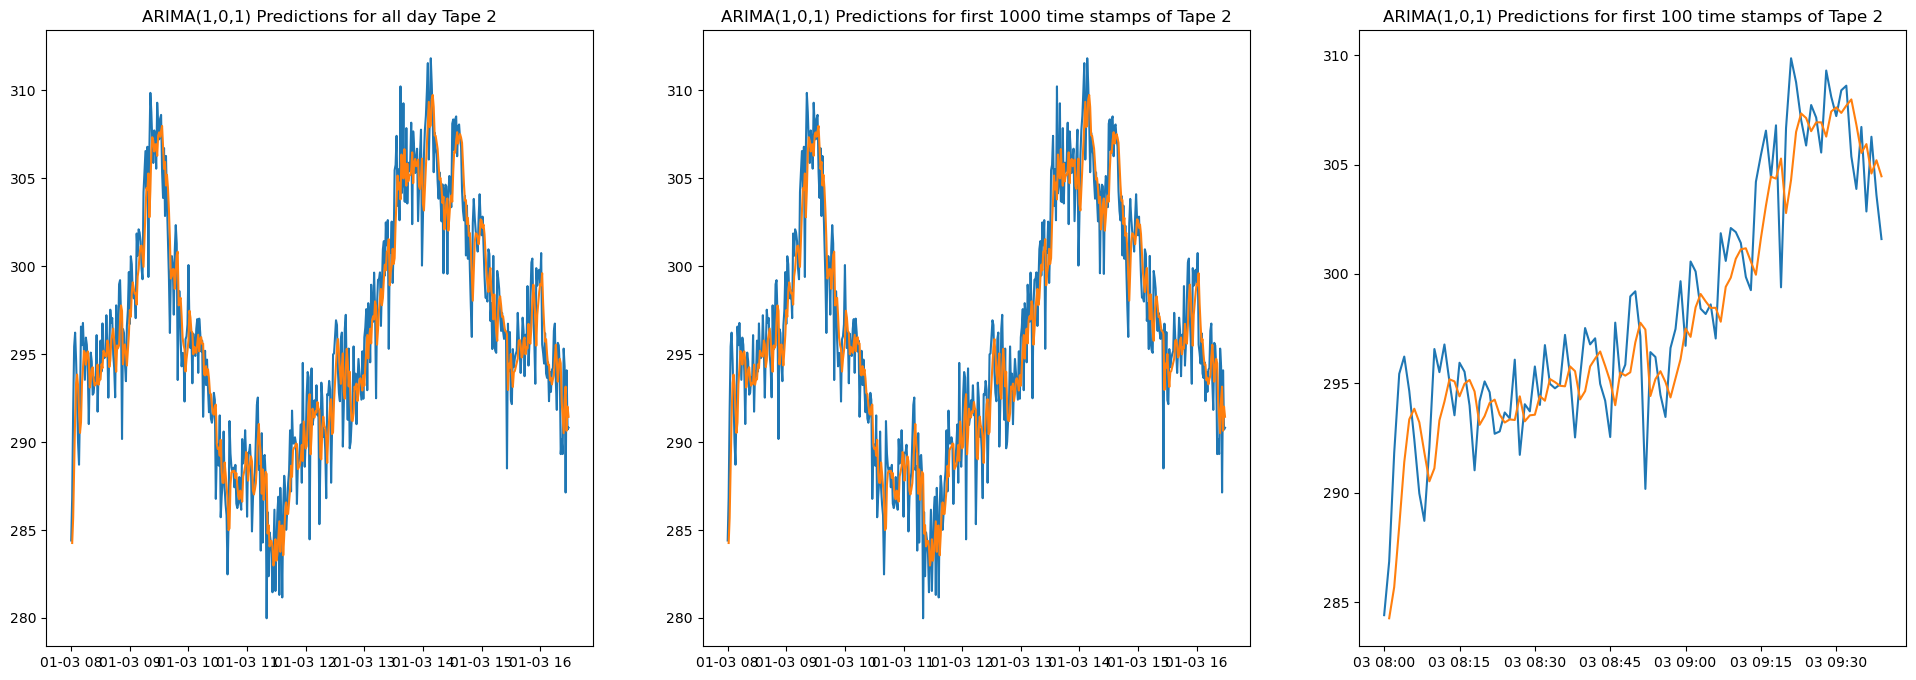

In [16]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(24,8))

pred2 = result2.predict(start=0, end=len(tape2_minute["Tapes Price"])-1)
ax1.plot(tape2_minute["Tapes Price"][:1000])
ax1.plot(pred2[1:])
ax1.set_title('ARIMA(1,0,1) Predictions for all day Tape 2')

ax2.plot(tape2_minute["Tapes Price"][:1000])
ax2.plot(pred2[1:1000])
ax2.set_title('ARIMA(1,0,1) Predictions for first 1000 time stamps of Tape 2')

ax3.plot(tape2_minute["Tapes Price"][:100])
ax3.plot(pred2[1:100]) 
ax3.set_title('ARIMA(1,0,1) Predictions for first 100 time stamps of Tape 2')